In [1]:
# Data Wrangling II
# Create an “Academic performance” dataset of students and perform the following operations using 
# Python.
#   1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
#      inconsistencies, use any of the suitable techniques to deal with them.
#   2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
#      to deal with them.
#   3. Apply data transformations on at least one of the variables. The purpose of this 
#      transformation should be one of the following reasons: to change the scale for better 
#      understanding of the variable, to convert a non-linear relation into a linear one, or to decrease 
#      the skewness and convert the distribution into a normal distribution.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('../academic performance.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50,12,50,No,Bad,Above-7,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    object 
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  480 non-null    object 
 9   raisedhands               455 non-null    float64
 10  VisITedResources          480 non-null    int64  
 11  AnnouncementsView         480 non-null    int64  
 12  Discussion                480 non-null    int64  
 13  ParentAnsweringSurvey     480 non-null    object 
 14  Parentscho

In [5]:
#   1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
#      inconsistencies, use any of the suitable techniques to deal with them.
data.isnull().sum() #check for missing values

gender                       0
NationalITy                  0
PlaceofBirth                 0
StageID                      0
GradeID                      0
SectionID                    0
Topic                        0
Semester                     0
Relation                     0
raisedhands                 25
VisITedResources             0
AnnouncementsView            0
Discussion                   0
ParentAnsweringSurvey        0
ParentschoolSatisfaction     0
StudentAbsenceDays           0
Class                        0
dtype: int64

In [6]:
# we can remove null values by dropping rows or fill null values as per features
# data1 = data.interpolate()

In [7]:
# data1.isnull().sum()

In [8]:
mean_val = data['raisedhands'].mean()
data['raisehands']=data['raisehands'].fillna(mean_val)
data2.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [9]:
# Or we can drop null value rows
# data.dropna(axis=0, inplace=True)

Before Shape (480, 17)
After Shape (427, 17)


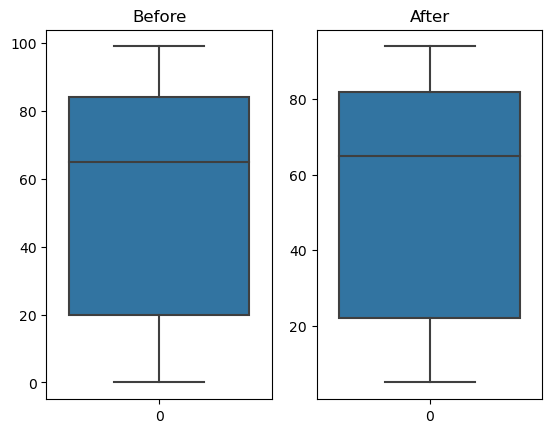

In [10]:
#   2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
#      to deal with them.
fig,axis = plt.subplots(1, 2)
max_val = data2.VisITedResources.quantile(0.95)
min_val = data2.VisITedResources.quantile(0.05)
print("Before Shape", data.shape)
df = data2[(data2['VisITedResources'] > min_val) & (data2['VisITedResources'] < max_val)]
print("After Shape", df.shape)
sns.boxplot(data2['VisITedResources'], orient='v', ax=axis[0])
axis[0].title.set_text('Before')
sns.boxplot(df['VisITedResources'], orient='v', ax=axis[1])
axis[1].title.set_text('After')
plt.show()

In [11]:
#   3. Apply data transformations on at least one of the variables. The purpose of this 
#      transformation should be one of the following reasons: to change the scale for better 
#      understanding of the variable, to convert a non-linear relation into a linear one, or to decrease 
#      the skewness and convert the distribution into a normal distribution.

In [12]:
scaler = StandardScaler()
x = df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']]
scaledf = scaler.fit_transform(x)
print(scaledf)

[[-1.15922617 -1.29844429 -1.42428794 -0.90164582]
 [-0.99010159 -1.16788899 -1.38643105 -0.71803137]
 [-1.32835075 -1.59219371 -1.50000172 -0.53441693]
 ...
 [ 0.19377045  0.59460753 -0.55357945 -0.57113982]
 [-0.65185244 -1.26580546 -0.97000525  0.45710106]
 [-0.48272786 -1.36372194 -0.62929323  0.6407155 ]]


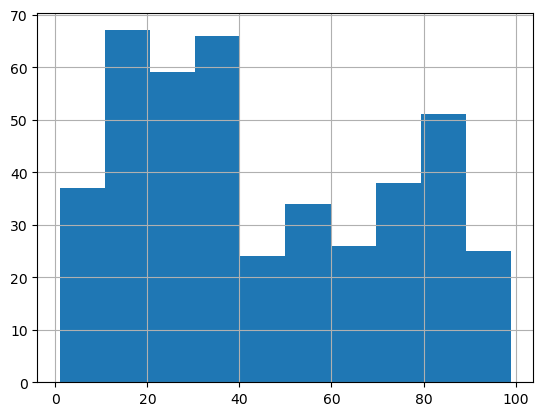

In [13]:
df.Discussion.hist()
plt.show()

In [14]:
import scipy.stats as stats

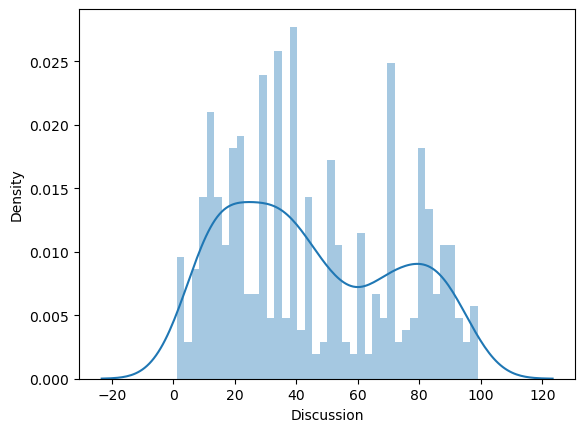

In [15]:
sns.distplot(df['Discussion'], bins = 40)
plt.show()

In [16]:
# Checking the skewness
df['Discussion'].skew()

0.33203952447202845

In [17]:
# If you want to reduce skewness there are 4 methods, one of them is log
log = np.log(df['Discussion'])
print(log.skew())

-1.1910468123704019


<Axes: xlabel='Discussion', ylabel='Density'>

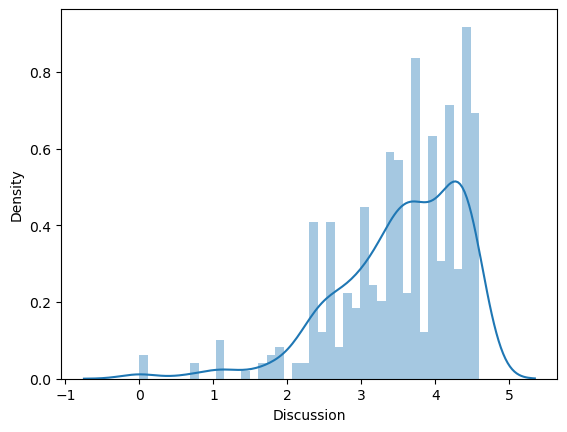

In [18]:
sns.distplot(log, bins = 40)